<a href="https://colab.research.google.com/github/jyj1206/BDA_9th_ML1/blob/main/%EA%B3%BC%EC%A0%9C2-1_Titanic_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_KNN_%EC%84%B1%EB%8A%A5_%EA%B0%9C%EC%84%A0%ED%95%98%EA%B8%B0(Accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 로드 및 전처리
titanic = sns.load_dataset('titanic')

data = titanic[['pclass', 'sex', 'age', 'fare', 'survived']].dropna()
data['sex'] = data['sex'].map({'male': 0, 'female': 1})  # 성별을 숫자로 변환

# 독립변수와 종속변수 분리
X = data[['pclass', 'sex', 'age', 'fare']].copy()
y = data['survived']

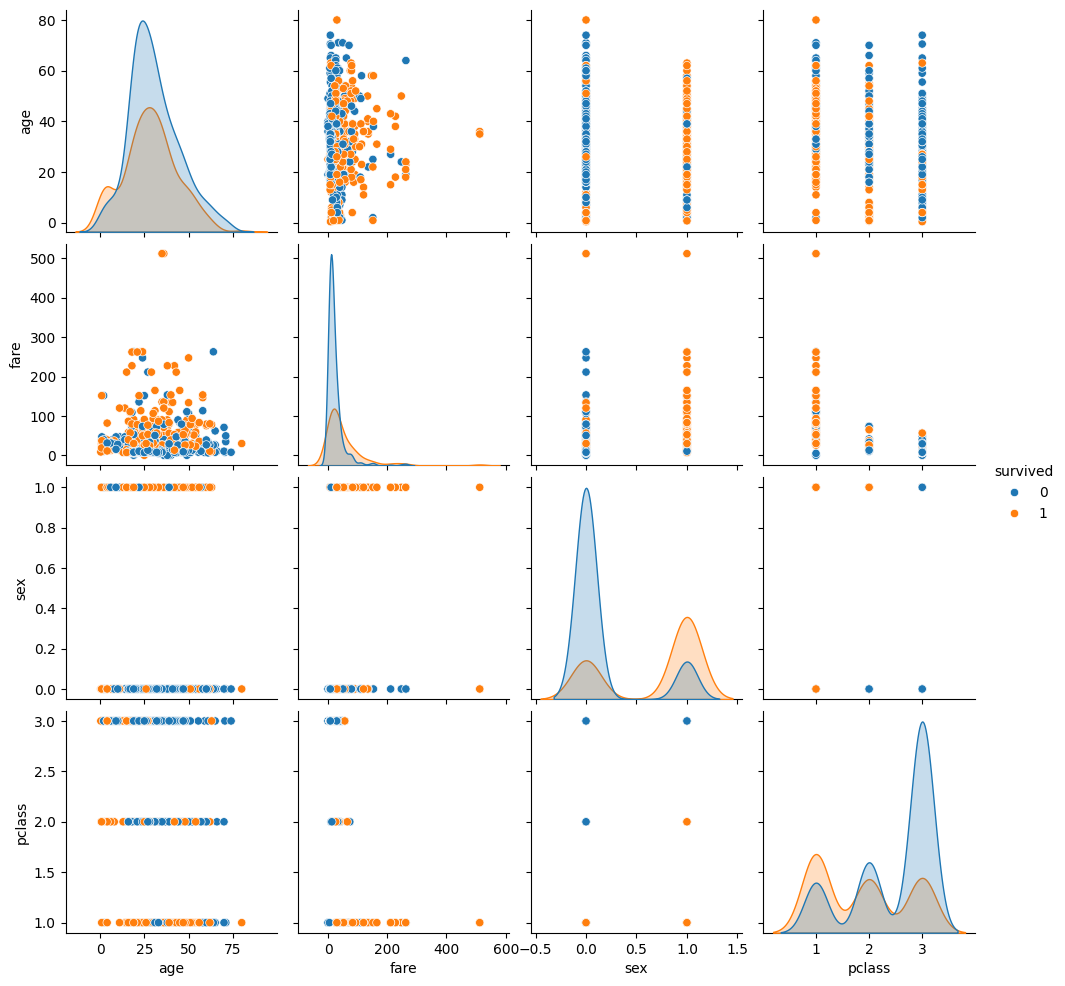

In [ ]:
# 데이터 분포 시각화
sns.pairplot(data[['age', 'fare', 'sex', 'pclass', 'survived']], hue='survived')
plt.show()

In [ ]:
# log 변환
X['log_fare'] = np.log1p(data['fare'])
X.drop(columns='fare', inplace=True)

# feature 추가
X['age_group'] = pd.cut(X['age'], bins=[0, 12, 60, 100], labels=['child', 'adult', 'senior'])
X['sex_age_interaction'] = X['sex'] * X['age']
X['log_fare_per_class'] = X['log_fare'] / X['pclass']

In [ ]:
# 범주형 변수, 수치형 변수 확인
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['category']).columns

In [ ]:
# 수치형 변수 표준화
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [ ]:
# 범주형 변수 원핫 인코딩
X = pd.get_dummies(X, columns=categorical_columns)

In [ ]:
# 데이터 확인
X

,pclass,sex,age,log_fare,sex_age_interaction,log_fare_per_class,age_group_child,age_group_adult,age_group_senior
0,0.911232,-0.759051,-0.530377,-0.978995,-0.641254,-0.781492,False,True,False
1,-1.476364,1.317434,0.571831,1.301314,1.746682,1.639778,False,True,False
2,0.911232,1.317434,-0.254825,-0.896368,0.992597,-0.763749,False,True,False
3,-1.476364,1.317434,0.365167,0.996879,1.558161,1.443650,False,True,False
4,0.911232,-0.759051,0.365167,-0.881756,-0.641254,-0.760611,False,True,False
...,...,...,...,...,...,...,...,...,...
885,0.911232,1.317434,0.640719,0.381746,1.809522,-0.489281,False,True,False
886,-0.282566,-0.759051,-0.185937,-0.423365,-0.641254,-0.364460,False,True,False
887,-1.476364,1.317434,-0.737041,0.411828,0.552714,1.066741,False,True,False
889,-1.476364,-0.759051,-0.254825,0.411828,-0.641254,1.066741,False,True,False


In [ ]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
#grid_search 적용
param_grid = {
    'n_neighbors': np.arange(1, 15, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'kd_tree', 'ball_tree'],
}

knn=KNeighborsClassifier()

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv=5, scoring= 'accuracy')
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 정확도 확인
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'최적의 하이퍼 파라미터 {best_params}')
print(f'교차검증 정확도 Best_score :{best_score:.4f}')

최적의 하이퍼 파라미터 {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
교차검증 정확도 Best_score :0.8284


In [ ]:
best_knn=KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
y_test_pred = best_knn.predict(X_test)

test_accruacy = accuracy_score(y_test,y_test_pred)
print(f'정확도:{test_accruacy:.4f}')

정확도:0.7692


### baseline 모델 대비 test accuracy 변화
- 0.6783 -> 0.7692